In [1]:
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

## PART 1 : Exploration des données
    - Gestion des valeurs manquantes (TotalCharges : 11 -> mean(TotalCharges))
    - Encodage des variables
    - Normalisation

In [2]:
data = pd.read_csv('../../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df = data.copy()
df["gender"]= data["gender"].apply(lambda x: 0 if x ==  'Male' else 1)
for col in ["Partner", "PhoneService", 'PaperlessBilling', 'Churn', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Dependents','OnlineSecurity']:
    data[col]= data[col].apply(lambda x: 0 if x ==  'No' else 1)

In [8]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: >

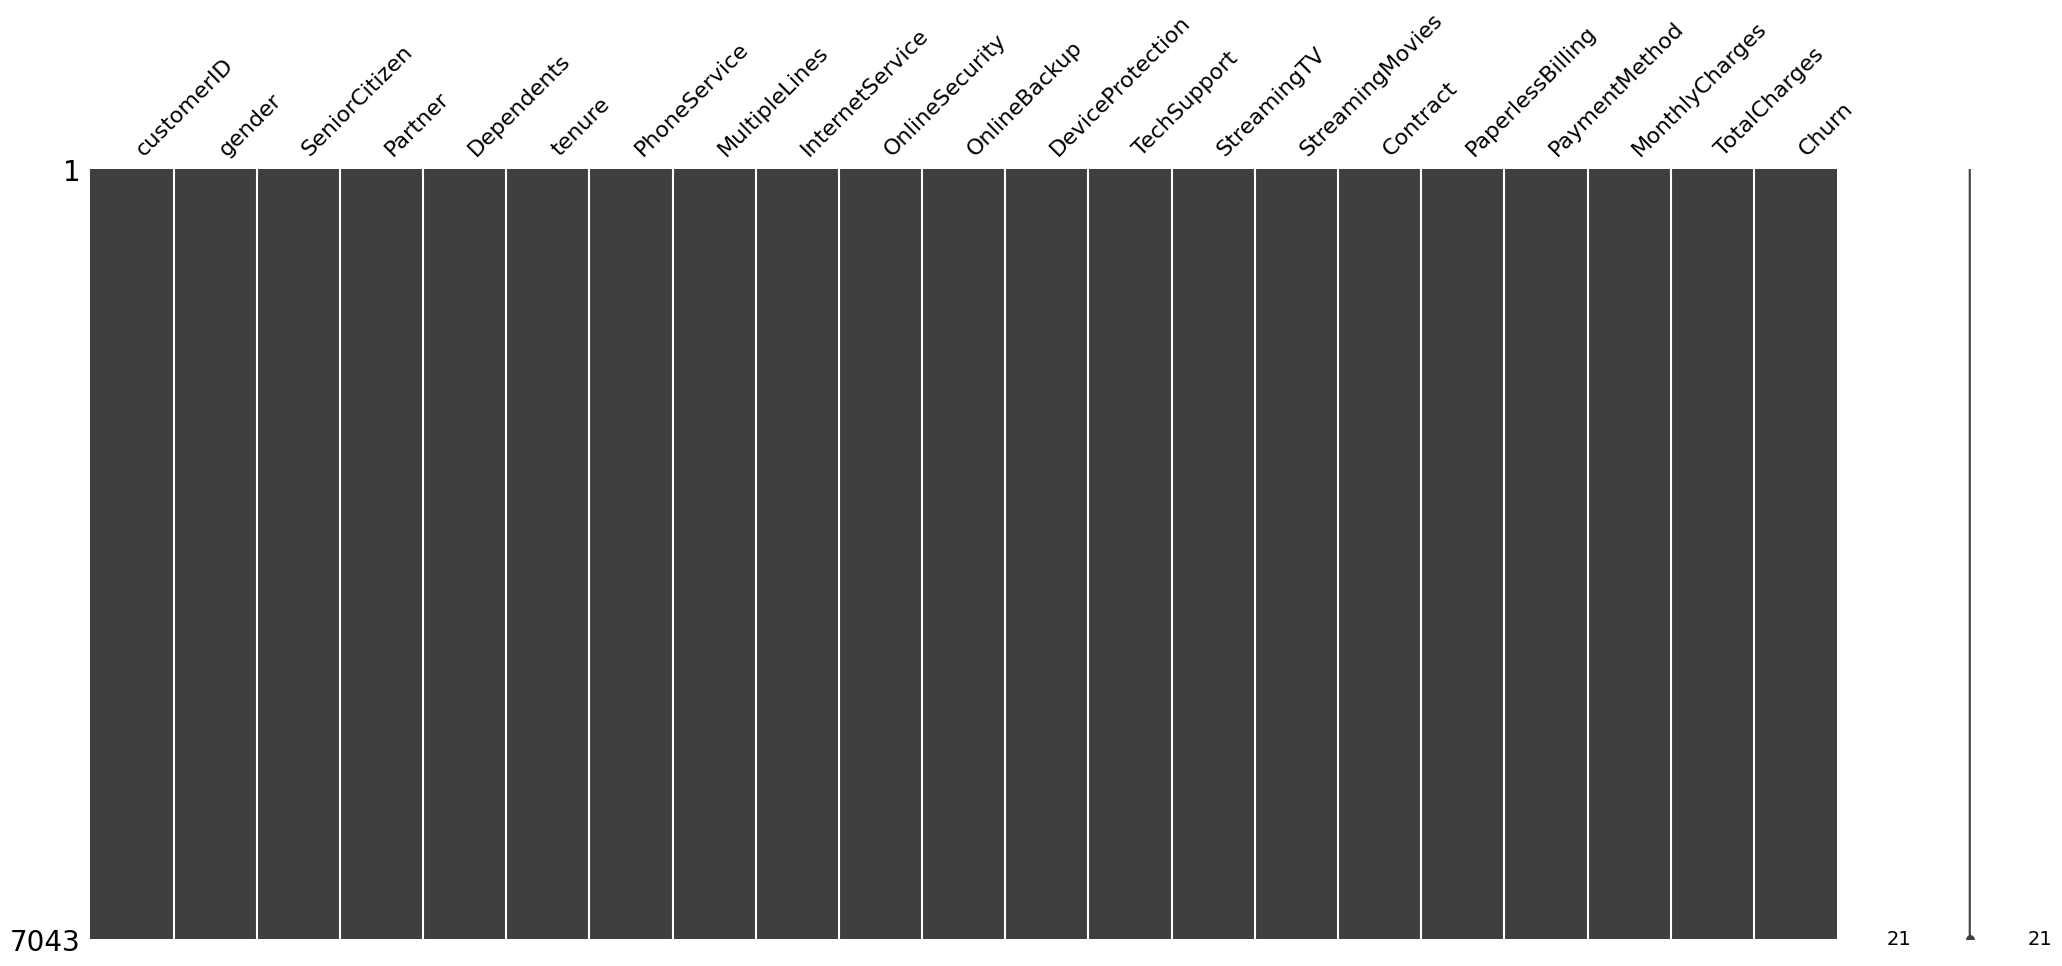

In [9]:
msno.matrix(data)

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [11]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)

### Encodage des colonnes binaires

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,0,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

y = [1 if x == 'Yes' else 0 for x in data['Churn']]
X = data.drop(columns=['customerID','Churn','gender', 'PhoneService'])

print(X.columns)

numerical_columns = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = ['gender'Partner', 'Dependents', 
        'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


ValueError: A given column is not a column of the dataframe

In [14]:
df['Partner'] = LabelEncoder().fit_transform(df['Partner'])
df['Dependents'] = LabelEncoder().fit_transform(df['Dependents'])
df['PhoneService'] = LabelEncoder().fit_transform(df['PhoneService'])
df['OnlineSecurity'] = LabelEncoder().fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = LabelEncoder().fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = LabelEncoder().fit_transform(df['DeviceProtection'])
df['TechSupport'] = LabelEncoder().fit_transform(df['TechSupport'])
df['StreamingTV'] = LabelEncoder().fit_transform(df['StreamingTV'])
df['StreamingMovies'] = LabelEncoder().fit_transform(df['StreamingMovies'])
df['PaperlessBilling'] = LabelEncoder().fit_transform(df['PaperlessBilling'])
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])
# df['MultipleLines_No phone service'] = LabelEncoder().fit_transform(df['MultipleLines_No phone service'])

# MultipleLines_No phone service





In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Encodage des colonnes multiples à faible cardinalité

In [16]:
#df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod' ], drop_first=False, dtype=int)
df = df.drop(['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod'], axis=1)

In [17]:
# print(df['MultipleLines_No phone service'].value_counts())

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,2,0,0,0,0,1,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,2,0,2,0,0,0,0,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,2,2,0,0,0,0,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,0,2,2,0,0,0,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,1


In [19]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

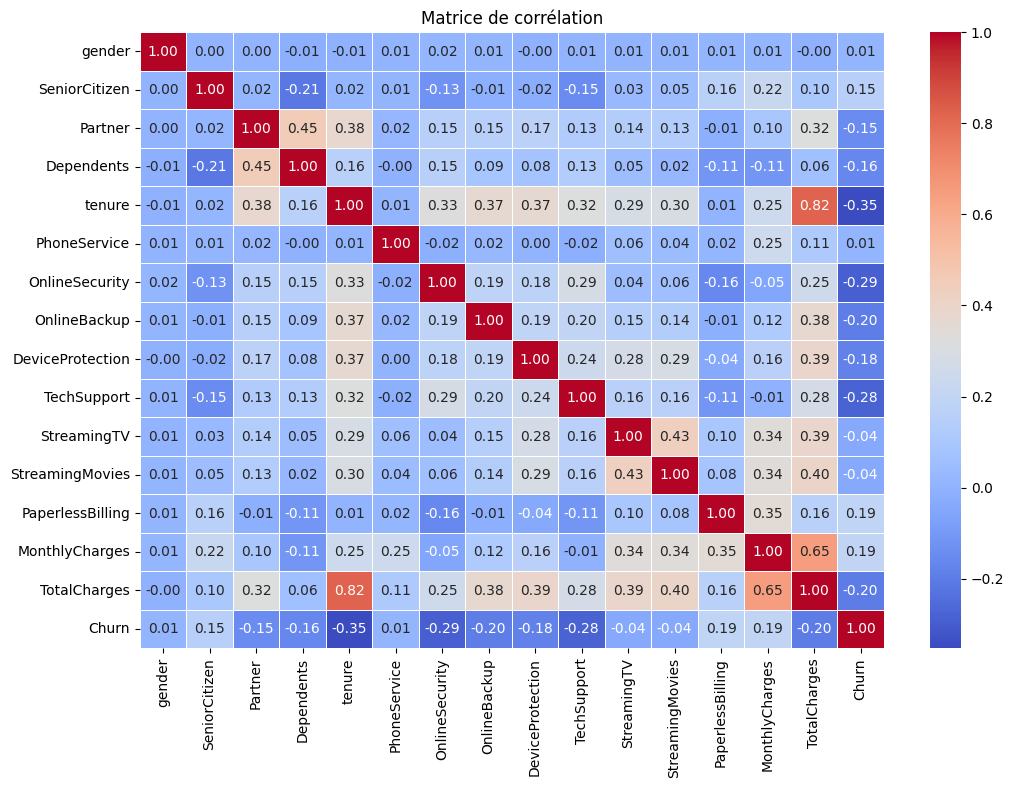

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que ton DataFrame s'appelle df
# Calcul de la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)

# Affichage de la matrice de corrélation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

In [22]:
X = df.drop(columns=["Churn", "customerID", "gender", "PhoneService"])
y = df["Churn"]
X.shape, y.shape

((7043, 13), (7043,))

In [23]:
X.head(5)

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,1,0,1,0,2,0,0,0,0,1,29.85,29.85
1,0,0,0,34,2,0,2,0,0,0,0,56.95,1889.50
2,0,0,0,2,2,2,0,0,0,0,1,53.85,108.15
3,0,0,0,45,2,0,2,2,0,0,0,42.30,1840.75
4,0,0,0,2,0,0,0,0,0,0,1,70.70,151.65


In [24]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [25]:
!pip install tensorflow


In [26]:
!nvcc --version

zsh:1: command not found: nvcc


## Deep Learning

In [27]:
from sklearn.model_selection import train_test_split

# X = df.drop(columns=['Churn'])
# y = df['Churn']                                # cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##  DEEP Learning Part 1 : TENSORFLOW

In [30]:
from dotenv import load_dotenv

load_dotenv()

os.environ["MLFLOW_TRACKING_USERNAME"] = "A-Delvoye"
os.environ["MLFLOW_TRACKING_PASSWORD"] = os.getenv("MLFLOW_TRACKING_PASSWORD")
os.environ["MLFLOW_TRACKING_URI"] = (
    "https://dagshub.com/A-Delvoye/TelcoNova_DeepL.mlflow"
)

In [31]:
import mlflow

mlflow.set_experiment("Classification binaire churn")
with mlflow.start_run():
  mlflow.log_param("learning_rate", 0.001)
  mlflow.log_param("batch_size", 32)
  mlflow.log_metric("recall", 0.80)


🏃 View run receptive-steed-121 at: https://dagshub.com/A-Delvoye/TelcoNova_DeepL.mlflow/#/experiments/1/runs/74721347c2704186bcba730272ac5f26
🧪 View experiment at: https://dagshub.com/A-Delvoye/TelcoNova_DeepL.mlflow/#/experiments/1


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(128, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # classification binaire
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


2025-05-21 09:24:31.513453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747812271.527604   68046 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747812271.531848   68046 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747812271.542479   68046 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747812271.542495   68046 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747812271.542497   68046 computation_placer.cc:177] computation placer alr

In [33]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7233 - loss: 0.5853 - val_accuracy: 0.7382 - val_loss: 0.5652
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7440 - loss: 0.5434 - val_accuracy: 0.7498 - val_loss: 0.5371
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7518 - loss: 0.5412 - val_accuracy: 0.7516 - val_loss: 0.5277
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7530 - loss: 0.5188 - val_accuracy: 0.7382 - val_loss: 0.5423
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7637 - loss: 0.5156 - val_accuracy: 0.7516 - val_loss: 0.5201
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7599 - loss: 0.5042 - val_accuracy: 0.7542 - val_loss: 0.5092
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7678 - loss: 0.5092 - val_accuracy: 0.7453 - val_loss: 0.5020
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7638 - loss: 0.5000 - val_accuracy: 0.

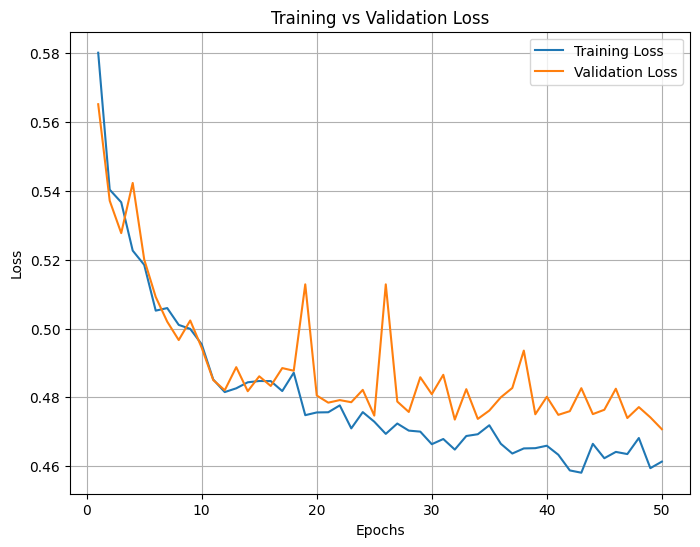

In [34]:
import matplotlib.pyplot as plt

# Extraire les valeurs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Tracer la courbe
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### Evaluation

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7752 - loss: 0.4444 

✅ Test Accuracy: 0.7764


## Rapport de classification

In [36]:
# Rapport de classification
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.59      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

Confusion Matrix:
 [[904 131]
 [184 190]]


### values en fonction du temps

In [37]:
y_pred_prob = model.predict(X_test).ravel()  # .ravel() pour aplatir en 1D


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [38]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.8194


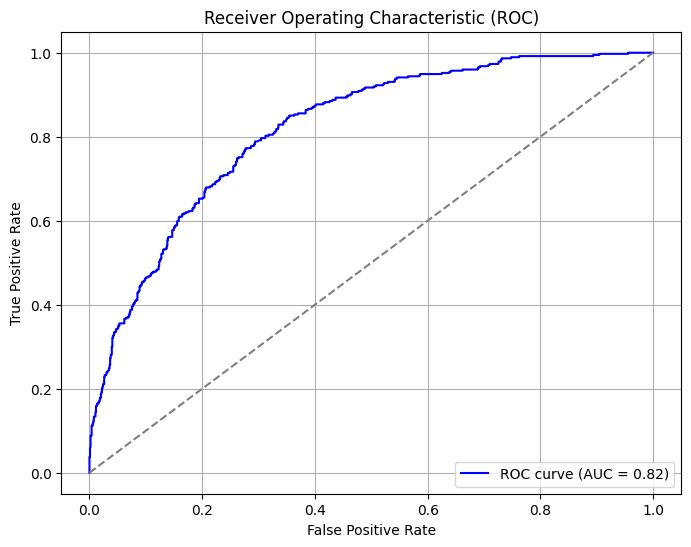

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonale
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Confusion matrix

In [40]:
# Confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matrice de confusion")

# Sauvegarde dans le dossier output
plt.tight_layout()
# plt.savefig("output/02_confusion_matrix.png")
plt.close()

### SHAP values

In [41]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Conversion en tableau dense (utile si sparse matrix issue d'un OneHotEncoder)
X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, "toarray") else X_test

# Initialisation du DeepExplainer avec des données de fond (background)
explainer = shap.DeepExplainer(model, X_train_dense[:100])  # Attention : modèle doit être Keras ou TF

# Calcul des valeurs SHAP pour un échantillon test
shap_values = explainer.shap_values(X_test_dense[:50])  # 50 premiers exemples

# Récupération des noms de features encodées
ohe = clf.named_steps['preprocessor'].named_transformers_['one-hot-encoder']
encoded_cat_names = ohe.get_feature_names_out(categorical_columns)

# Fusion avec les colonnes numériques
all_feature_names = np.concatenate([encoded_cat_names, np.array(numerical_columns)])

# Si shap_values a une dimension supplémentaire inutile (ex: (1, 50, 36)), on la squeeze
shap_values_squeezed = np.squeeze(shap_values, axis=0 if len(shap_values) == 1 else 2)

# Résumé SHAP (affichage global des features les plus influentes)
shap.summary_plot(shap_values_squeezed, X_test_dense[:50], feature_names=all_feature_names, show=False)

# Sauvegarde du graphique
plt.savefig("img/shap_summary_plot.png", bbox_inches='tight', dpi=300)


/home/antoine/Documents/Projets_DEV_IA/Brief_Deep_Learning_01/TelcoNova_DeepL/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/antoine/Documents/Projets_DEV_IA/Brief_Deep_Learning_01/TelcoNova_DeepL/.venv/lib/python3.12/site-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/home/antoine/Documents/Projets_DEV_IA/Brief_Deep_Learning_01/TelcoNova_DeepL/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 13))']
  warnings.warn(msg)
/home/antoine/Doc

KeyError: 0

##  DEEP Learning Part 2 : PYTORCH